In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [103]:
data=pd.read_csv(r'C:\Users\נעמיה\OneDrive - Ariel University\Documents\Data sciente\finall project\cardio_train.csv',sep=";", index_col="id")


#### There are 3 types of input features:
- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.<br><br>
 #### Features:<br>
- Age | Objective Feature | age | int (days)<br>
- Height | Objective Feature | height | int (cm) |<br>
- Weight | Objective Feature | weight | float (kg) |<br>
- Gender | Objective Feature | gender | categorical code |<br>
- Systolic blood pressure | Examination Feature | ap_hi | int |<br>
- Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
- Smoking | Subjective Feature | smoke | binary |<br>
- Alcohol intake | Subjective Feature | alco | binary |<br>
- Physical activity | Subjective Feature | active | binary |<br>
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |<br><br>
All of the dataset values were collected at the moment of medical examination.<br></font></span></left>

In [104]:
data.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0
9,22113,1,157,93.0,130,80,3,1,0,0,1,0
12,22584,2,178,95.0,130,90,3,3,0,0,1,1
13,17668,1,158,71.0,110,70,1,1,0,0,1,0


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [106]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='cardio', ylabel='count'>

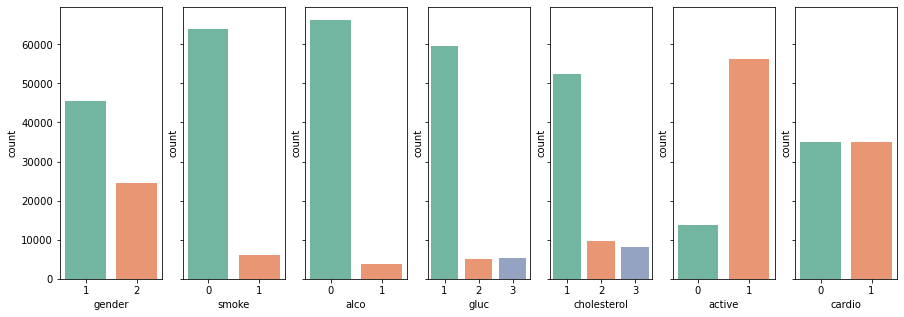

In [107]:
f, axes = plt.subplots(1, 7, figsize=(15, 5), sharex=False,sharey=True)
sns.countplot(x='gender',data=data,ax=axes[0],palette="Set2")
sns.countplot(x='smoke',data=data,ax=axes[1],palette="Set2")
sns.countplot(x='alco',data=data,ax=axes[2],palette="Set2")
sns.countplot(x='gluc',data=data,ax=axes[3],palette="Set2")
sns.countplot(x='cholesterol',data=data,ax=axes[4],palette="Set2")
sns.countplot(x='active',data=data,ax=axes[5],palette="Set2")
sns.countplot(x='cardio',data=data,ax=axes[6],palette="Set2")

<AxesSubplot:xlabel='gender', ylabel='cardio'>

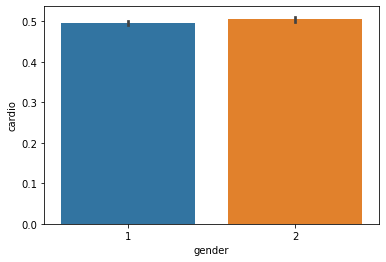

In [80]:
sns.barplot(x="gender",y="cardio" ,data=data)

<AxesSubplot:xlabel='bmi', ylabel='rel'>

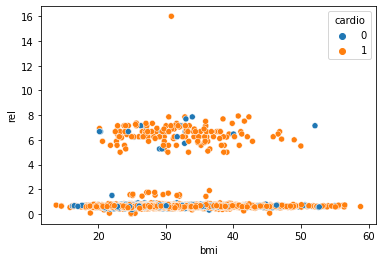

In [38]:
df=df[df['ap_hi']>0]
df=df[df['ap_lo']>0]
cl=df[df['cholesterol']==3]
sns.scatterplot(x='bmi',y='rel',hue='cardio',data=cl)

<AxesSubplot:>

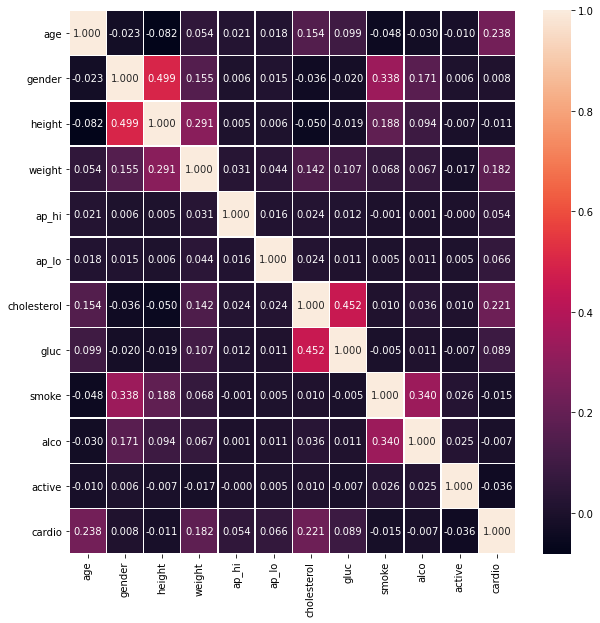

In [81]:
corr = data.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

In [108]:
data["bmi"] = data["weight"]/ (data["height"]/100)**2

<AxesSubplot:>

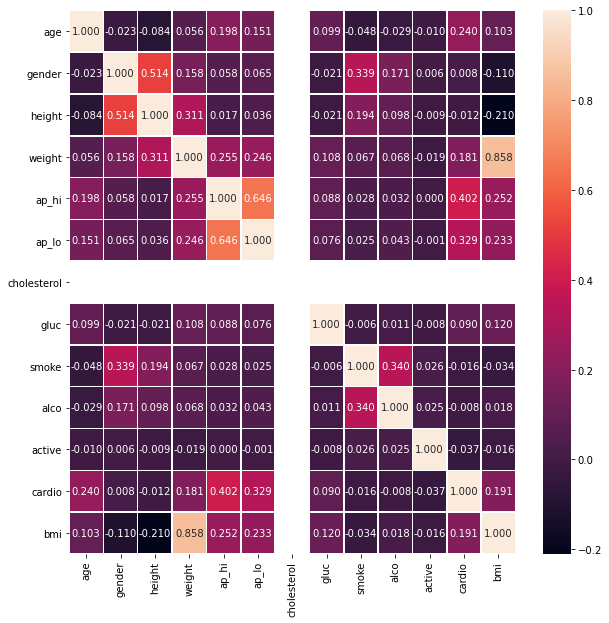

In [109]:
corr = df.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

<AxesSubplot:xlabel='years', ylabel='count'>

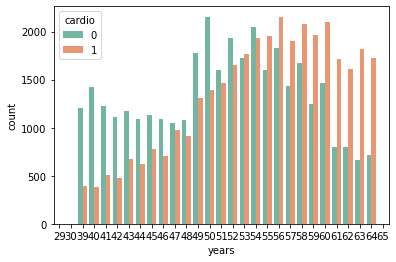

In [11]:
data['years'] = (data['age'] / 365).round(1).astype('int')
sns.countplot(x='years', hue='cardio', data = data, palette="Set2")

<AxesSubplot:xlabel='bmi', ylabel='rel'>

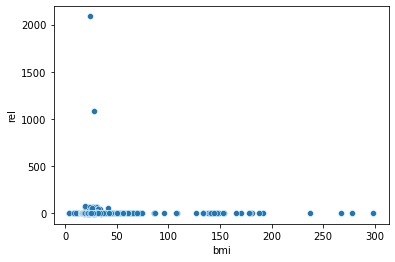

In [12]:
data['rel'] =data['ap_lo']/data['ap_hi']
sns.scatterplot(x='bmi',y='rel',data=data)

In [124]:
df=data[data['bmi']<60]
df=df[df['bmi']>10]

out_filter = ((df["ap_hi"]>200) | (df["ap_lo"]>200) |(df["ap_hi"]<0) | (df["ap_lo"]<0))
df = df[~out_filter]
# out_filter = (())
# df = df[~out_filter]

df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579


In [88]:
X = df.drop(['cardio'],axis=1)
y = df['cardio']

In [125]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)

In [126]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
knn.predict(X_test)
knn.score(X_test,y_test)

0.721496953872933

In [127]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)
y_train_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [128]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[25293,  7748],
       [11309, 21133]], dtype=int64)

In [123]:
yy=y_train
confusion_matrix(y_train, yy)

array([[33052,     0],
       [    0, 32431]], dtype=int64)

In [22]:
6970/19891

0.35040973304509576

In [132]:
from sklearn.metrics import f1_score

knn.predict_proba(X_test)

array([[0.96, 0.04],
       [0.88, 0.12],
       [0.68, 0.32],
       ...,
       [0.16, 0.84],
       [0.44, 0.56],
       [0.28, 0.72]])

In [64]:
df['gender']

id
0        2
1        1
2        1
3        2
4        1
        ..
99993    2
99995    1
99996    2
99998    1
99999    1
Name: gender, Length: 69871, dtype: int64